<a href="https://colab.research.google.com/github/Degananda264/Topic-Modelling-on-Research-Papers/blob/master/Topic_Modelling_on_Research_Papers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

/bin/bash: nvidia-sim: command not found


**Download Data and Dependencies**

In [2]:
!wget https://cs.nyu.edu/~roweis/data/nips12raw_str602.tgz
!tar -xzf nips12raw_str602.tgz

--2020-07-16 14:20:13--  https://cs.nyu.edu/~roweis/data/nips12raw_str602.tgz
Resolving cs.nyu.edu (cs.nyu.edu)... 128.122.49.30
Connecting to cs.nyu.edu (cs.nyu.edu)|128.122.49.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12851423 (12M) [application/x-gzip]
Saving to: ‘nips12raw_str602.tgz’

nips12raw_str602.tg 100%[===================>]  12.26M  20.2MB/s    in 0.6s    

2020-07-16 14:20:13 (20.2 MB/s) - ‘nips12raw_str602.tgz’ saved [12851423/12851423]



In [3]:
!pip install tqdm
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
import os
import numpy as np
import pandas as pd

DATA_PATH = 'nipstxt/'
print(os.listdir(DATA_PATH))

['idx', 'orig', 'nips11', 'nips02', 'nips07', 'nips12', 'README_yann', 'nips06', 'nips01', 'nips09', 'nips03', 'nips05', 'nips00', 'nips10', 'nips08', 'RAW_DATA_NOTES', 'nips04', 'MATLAB_NOTES']


**Load NIPS Research Papers Data**

In [5]:
folders = ["nips{0:02}".format(i) for i in range(0,13)]
# Read all texts into a list.
papers = []
for folder in folders:
    file_names = os.listdir(DATA_PATH + folder)
    for file_name in file_names:
        with open(DATA_PATH + folder + '/' + file_name, encoding='utf-8', errors='ignore', mode='r+') as f:
            data = f.read()
        papers.append(data)
len(papers)

1740

In [6]:
papers[0]

'27O \nCorrelational Strength and Computational Algebra \nof Synaptic Connections Between Neurons \nEberhard E. Fetz \nDepartment of Physiology & Biophysics, \nUniversity of Washington, Seattle, WA 98195 \nABSTRACT \nIntracellular recordings in spinal cord motoneurons and cerebral \ncortex neurons have provided new evidence on the correlational strength of \nmonosynaptic connections, and the relation between the shapes of \npostsynaptic potentials and the associated increased firing probability. In \nthese cells, excitatory postsynaptic potentials (EPSPs) produce cross- \ncorrelogram peaks which resemble in large part the derivative of the EPSP. \nAdditional synaptic noise broadens the peak, but the peak area -- i.e., the \nnumber of above-chance firings triggered per EPSP -- remains proportional to \nthe EPSP amplitude. A typical EPSP of 100 gv triggers about .01 firings per \nEPSP. The consequences of these data for information processing by \npolysynaptic connections is discussed. T

In [7]:
print(papers[0][:1000])

27O 
Correlational Strength and Computational Algebra 
of Synaptic Connections Between Neurons 
Eberhard E. Fetz 
Department of Physiology & Biophysics, 
University of Washington, Seattle, WA 98195 
ABSTRACT 
Intracellular recordings in spinal cord motoneurons and cerebral 
cortex neurons have provided new evidence on the correlational strength of 
monosynaptic connections, and the relation between the shapes of 
postsynaptic potentials and the associated increased firing probability. In 
these cells, excitatory postsynaptic potentials (EPSPs) produce cross- 
correlogram peaks which resemble in large part the derivative of the EPSP. 
Additional synaptic noise broadens the peak, but the peak area -- i.e., the 
number of above-chance firings triggered per EPSP -- remains proportional to 
the EPSP amplitude. A typical EPSP of 100 gv triggers about .01 firings per 
EPSP. The consequences of these data for information processing by 
polysynaptic connections is discussed. The effects of sequ

**Basic Text Pre-processing**

In [8]:
%%time
import nltk
import tqdm

stop_words = nltk.corpus.stopwords.words('english')
wtk = nltk.tokenize.RegexpTokenizer(r'\w+')
wnl = nltk.stem.wordnet.WordNetLemmatizer()

def normalize_corpus(papers):
    norm_papers = []
    for paper in tqdm.tqdm(papers):
        paper = paper.lower()
        paper_tokens = [token.strip() for token in wtk.tokenize(paper)]
        paper_tokens = [wnl.lemmatize(token) for token in paper_tokens if not token.isnumeric()]
        paper_tokens = [token for token in paper_tokens if len(token) > 1]
        paper_tokens = [token for token in paper_tokens if token not in stop_words]
        paper_tokens = list(filter(None, paper_tokens))
        if paper_tokens:
            norm_papers.append(paper_tokens)
            
    return norm_papers
    
norm_papers = normalize_corpus(papers)
print(len(norm_papers))


100%|██████████| 1740/1740 [00:31<00:00, 55.25it/s]

1740
CPU times: user 31 s, sys: 400 ms, total: 31.4 s
Wall time: 31.5 s


In [9]:
print(norm_papers[0][:50])

['27o', 'correlational', 'strength', 'computational', 'algebra', 'synaptic', 'connection', 'neuron', 'eberhard', 'fetz', 'department', 'physiology', 'biophysics', 'university', 'washington', 'seattle', 'wa', 'abstract', 'intracellular', 'recording', 'spinal', 'cord', 'motoneuron', 'cerebral', 'cortex', 'neuron', 'provided', 'new', 'evidence', 'correlational', 'strength', 'monosynaptic', 'connection', 'relation', 'shape', 'postsynaptic', 'potential', 'associated', 'increased', 'firing', 'probability', 'cell', 'excitatory', 'postsynaptic', 'potential', 'epsps', 'produce', 'cross', 'correlogram', 'peak']


In [10]:
len(norm_papers),len(norm_papers[0])

(1740, 1526)

**Build a Bi-gram Phrase Model**

In [11]:
import gensim
bigram = gensim.models.Phrases(norm_papers, min_count=20, threshold=20, delimiter=b'_') # higher threshold fewer phrases.
bigram_model = gensim.models.phrases.Phraser(bigram)
print(bigram_model[norm_papers[0]][:50])

['27o', 'correlational', 'strength', 'computational', 'algebra', 'synaptic', 'connection', 'neuron', 'eberhard', 'fetz', 'department', 'physiology', 'biophysics', 'university', 'washington', 'seattle', 'wa', 'abstract', 'intracellular_recording', 'spinal_cord', 'motoneuron', 'cerebral_cortex', 'neuron', 'provided', 'new', 'evidence', 'correlational', 'strength', 'monosynaptic', 'connection', 'relation', 'shape', 'postsynaptic_potential', 'associated', 'increased', 'firing', 'probability', 'cell', 'excitatory', 'postsynaptic_potential', 'epsps', 'produce', 'cross', 'correlogram', 'peak', 'resemble', 'large', 'part', 'derivative', 'epsp']


In [12]:
norm_corpus_bigrams = [bigram_model[doc] for doc in norm_papers]

# Create a dictionary representation of the documents.
dictionary = gensim.corpora.Dictionary(norm_corpus_bigrams)

In [13]:
list(dictionary.items())[:10]

[(0, '27o'),
 (1, 'abst'),
 (2, 'abstract'),
 (3, 'acknowledgement_author'),
 (4, 'action_potential'),
 (5, 'active'),
 (6, 'activity'),
 (7, 'add'),
 (8, 'addition'),
 (9, 'additional')]

In [14]:
len(dictionary)

78892

In [15]:
# Filter out words that occur less than 20 documents, or more than 60% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.6)
print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 7756


In [16]:
# Transforming corpus into bag of words vectors
bow_corpus = [dictionary.doc2bow(text) for text in norm_corpus_bigrams]
print(bow_corpus[1][:50])

[(0, 2), (3, 2), (6, 5), (14, 6), (15, 1), (16, 1), (25, 2), (27, 2), (28, 2), (49, 2), (61, 1), (62, 5), (65, 1), (66, 1), (67, 3), (68, 2), (69, 1), (74, 3), (75, 4), (80, 1), (96, 1), (102, 1), (109, 1), (111, 2), (113, 1), (120, 4), (121, 37), (124, 1), (133, 1), (144, 1), (149, 27), (159, 1), (165, 4), (176, 3), (178, 2), (191, 2), (196, 1), (202, 1), (203, 3), (205, 2), (208, 14), (211, 1), (212, 2), (213, 9), (214, 1), (215, 3), (216, 1), (220, 1), (221, 1), (236, 2)]


In [17]:
print([(dictionary[idx] , freq) for idx, freq in bow_corpus[1][:]])

[('abstract', 2), ('active', 2), ('addition', 5), ('allows', 6), ('although', 1), ('american_institute', 1), ('around', 2), ('arrow', 2), ('associated', 2), ('certain', 2), ('common', 1), ('comparison', 5), ('component', 1), ('computational', 1), ('computed', 3), ('computer', 2), ('conclusion', 1), ('connected', 3), ('connection', 4), ('considered', 1), ('cross', 1), ('decrease', 1), ('determined', 1), ('difference', 2), ('direct', 1), ('dynamic', 4), ('edge', 37), ('effort', 1), ('essentially', 1), ('feature', 1), ('fig', 27), ('four', 1), ('higher', 4), ('increase', 3), ('independent', 2), ('interconnected', 2), ('inverse', 1), ('largely', 1), ('larger', 3), ('le', 2), ('level', 14), ('linear', 1), ('linearly', 2), ('link', 9), ('long', 1), ('loop', 3), ('magnitude', 1), ('measured', 1), ('mechanism', 1), ('multiple', 2), ('order_magnitude', 9), ('pair', 1), ('parallel', 38), ('part', 1), ('per', 1), ('plotted', 2), ('plus', 2), ('produce', 2), ('product', 4), ('propagation', 1), ('p

In [18]:
print('Total number of papers:', len(bow_corpus))

Total number of papers: 1740


**Topic Models with Latent Semantic Indexing (LSI)**

In [19]:
%%time

TOTAL_TOPICS = 10
lsi_bow = gensim.models.LsiModel(bow_corpus, id2word=dictionary, num_topics=TOTAL_TOPICS,
                                 onepass=True, chunksize=1740, power_iters=1000)

CPU times: user 6min 37s, sys: 1min 45s, total: 8min 23s
Wall time: 5min 14s


In [20]:
for topic_id, topic in lsi_bow.print_topics(num_topics=10, num_words=20):
    print('Topic #'+str(topic_id+1)+':')
    print(topic)
    print()

Topic #1:
0.215*"unit" + 0.212*"state" + 0.187*"training" + 0.177*"neuron" + 0.162*"pattern" + 0.145*"image" + 0.140*"vector" + 0.125*"feature" + 0.122*"cell" + 0.110*"layer" + 0.101*"task" + 0.097*"class" + 0.091*"probability" + 0.089*"signal" + 0.087*"step" + 0.086*"response" + 0.085*"representation" + 0.083*"noise" + 0.082*"rule" + 0.081*"distribution"

Topic #2:
0.487*"neuron" + 0.396*"cell" + -0.257*"state" + 0.191*"response" + -0.187*"training" + 0.170*"stimulus" + 0.117*"activity" + -0.109*"class" + 0.099*"spike" + 0.097*"pattern" + 0.096*"circuit" + 0.096*"synaptic" + -0.095*"vector" + 0.090*"signal" + 0.090*"firing" + 0.088*"visual" + -0.084*"classifier" + -0.083*"action" + -0.078*"word" + 0.078*"cortical"

Topic #3:
-0.627*"state" + 0.395*"image" + -0.219*"neuron" + 0.209*"feature" + -0.188*"action" + 0.137*"unit" + 0.131*"object" + -0.130*"control" + 0.129*"training" + -0.109*"policy" + 0.103*"classifier" + 0.090*"class" + -0.081*"step" + -0.081*"dynamic" + 0.080*"classifica

In [21]:
for n in range(TOTAL_TOPICS):
    print('Topic #'+str(n+1)+':')
    print('='*50)
    d1 = []
    d2 = []
    for term, wt in lsi_bow.show_topic(n, topn=20):
        if wt >= 0:
            d1.append((term, round(wt, 3)))
        else:
            d2.append((term, round(wt, 3)))

    print('Direction 1:', d1)
    print('-'*50)
    print('Direction 2:', d2)
    print('-'*50)
    print()

Topic #1:
Direction 1: [('unit', 0.215), ('state', 0.212), ('training', 0.187), ('neuron', 0.177), ('pattern', 0.162), ('image', 0.145), ('vector', 0.14), ('feature', 0.125), ('cell', 0.122), ('layer', 0.11), ('task', 0.101), ('class', 0.097), ('probability', 0.091), ('signal', 0.089), ('step', 0.087), ('response', 0.086), ('representation', 0.085), ('noise', 0.083), ('rule', 0.082), ('distribution', 0.081)]
--------------------------------------------------
Direction 2: []
--------------------------------------------------

Topic #2:
Direction 1: [('neuron', 0.487), ('cell', 0.396), ('response', 0.191), ('stimulus', 0.17), ('activity', 0.117), ('spike', 0.099), ('pattern', 0.097), ('circuit', 0.096), ('synaptic', 0.096), ('signal', 0.09), ('firing', 0.09), ('visual', 0.088), ('cortical', 0.078)]
--------------------------------------------------
Direction 2: [('state', -0.257), ('training', -0.187), ('class', -0.109), ('vector', -0.095), ('classifier', -0.084), ('action', -0.083), ('w

**Getting U S AND VT Matrices**

In [22]:
term_topic = lsi_bow.projection.u
singular_values = lsi_bow.projection.s
topic_document = (gensim.matutils.corpus2dense(lsi_bow[bow_corpus], len(singular_values)).T / singular_values).T
term_topic.shape, singular_values.shape, topic_document.shape

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


((7756, 10), (10,), (10, 1740))

In [23]:
document_topics = pd.DataFrame(np.round(topic_document.T, 3), 
                               columns=['T'+str(i) for i in range(1, TOTAL_TOPICS+1)])
document_topics.head(15)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
0,0.022,0.049,-0.011,0.004,0.013,0.031,0.011,0.013,0.001,-0.013
1,0.038,0.003,0.009,-0.078,-0.023,-0.031,-0.044,0.015,0.068,-0.037
2,0.020,-0.005,0.014,-0.008,0.018,-0.008,0.047,-0.011,-0.014,-0.017
3,0.022,-0.004,-0.033,0.008,-0.029,0.008,0.009,0.007,-0.016,-0.003
4,0.029,0.028,-0.010,0.016,0.031,-0.031,-0.005,-0.035,0.007,-0.000
5,0.027,0.007,0.006,0.017,0.017,-0.035,0.008,0.001,0.079,-0.075
6,0.032,0.036,-0.011,-0.014,0.035,-0.052,0.016,0.043,-0.010,0.029
7,0.061,0.004,0.048,-0.127,-0.050,-0.027,-0.063,0.116,-0.026,-0.061
8,0.023,0.003,0.006,0.031,-0.016,-0.004,-0.028,-0.021,0.046,-0.021
9,0.012,-0.006,0.007,-0.018,0.008,-0.001,0.004,-0.005,0.003,0.013


In [24]:



for document_number in range(200,205):
    top_topics = list(document_topics.columns[np.argsort(-np.absolute(document_topics.iloc[document_number].values))[:3]])
    print('Document #'+str(document_number)+':')
    print('Dominant Topics (top 3):', top_topics)
    print('Paper Summary:')
    print(papers[document_number][:500])
    print()

Document #200:
Dominant Topics (top 3): ['T7', 'T5', 'T1']
Paper Summary:
622 Atlas, Cole, Connor, EI-Sharkawi, Marks, Muthusamy and Barnard 
Performance Comparisons Between 
Backpropagation Networks and Classification 
on Three Real-World Applications 
Trees 
Les Atlas 
Dept. of EE, FT-10 
University of Washington 
Seattle, Washington 98195 
Ronald Cole 
Dept. of CS&E 
Oregon Graduate Institute 
Beaverton, Oregon 97006 
Jerome Connor, Mohamed EI-Sharkawi, and Robert J. Marks II 
University of Washington 
Yeshwant Muthusamy 
Oregon Graduate Institute 
Etienne Barnard 

Document #201:
Dominant Topics (top 3): ['T8', 'T1', 'T7']
Paper Summary:
240 Lee 
Using A Translation-lnvariant Neural Network 
To Diagnose Heart Arrhythmia 
Susan Ciarrocca Lee 
The Johns Hopkins University 
Applied Physics Laboratory 
Laurel, Maryland 20707 
ABSTRACT 
Distinctive electrocardiogram (ECG) patterns are created when the heart 
is beating normally and when a d_angerous arrhythmia is present. Some 
devices 

**Implementing LSI Models from Scratch**

**Creating Term-Document Matrix**

1.   **The first step in SVD is to get the source matrix, which is typically a term-document matrix. We can obtain it from Gensim by converting the sparse Bag of Words representation into a dense matrix.**



In [25]:
td_matrix = gensim.matutils.corpus2dense(corpus=bow_corpus, num_terms=len(dictionary))
print(td_matrix.shape)
td_matrix

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


(7756, 1740)


array([[1., 2., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 2., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
vocabulary = np.array(list(dictionary.values()))
print('Total vocabulary size:', len(vocabulary))
vocabulary

Total vocabulary size: 7756


array(['abstract', 'acknowledgement_author', 'action_potential', ...,
       'smola', 'mozer_jordan', 'kearns_solla'], dtype='<U28')

**Performing SVD Matrix on Term-Document Matrix**

In [27]:

from scipy.sparse.linalg import svds

u, s, vt = svds(td_matrix, k=TOTAL_TOPICS, maxiter=10000)
term_topic = u
singular_values = s
topic_document = vt
term_topic.shape, singular_values.shape, topic_document.shape

((7756, 10), (10,), (10, 1740))

In [28]:
tt_weights = term_topic.transpose() * singular_values[:, None]
tt_weights.shape

(10, 7756)

In [29]:
top_terms = 20
topic_key_term_idxs = np.argsort(-np.absolute(tt_weights), axis=1)[:, :top_terms]
topic_keyterm_weights = np.array([tt_weights[row, columns] 
                             for row, columns in list(zip(np.arange(TOTAL_TOPICS), topic_key_term_idxs))])
topic_keyterms = vocabulary[topic_key_term_idxs]
topic_keyterms_weights = list(zip(topic_keyterms, topic_keyterm_weights))
for n in range(TOTAL_TOPICS):
    print('Topic #'+str(n+1)+':')
    print('='*50)
    d1 = []
    d2 = []
    terms, weights = topic_keyterms_weights[n]
    term_weights = sorted([(t, w) for t, w in zip(terms, weights)], 
                          key=lambda row: -abs(row[1]))
    for term, wt in term_weights:
        if wt >= 0:
            d1.append((term, round(wt, 3)))
        else:
            d2.append((term, round(wt, 3)))

    print('Direction 1:', d1)
    print('-'*50)
    print('Direction 2:', d2)
    print('-'*50)
    print()

Topic #1:
Direction 1: [('word', 188.486), ('vector', 85.972), ('node', 54.38), ('recognition', 53.231), ('sequence', 50.35), ('circuit', 45.396), ('cell', 44.811), ('hmm', 34.085), ('character', 34.022), ('chip', 32.162), ('matrix', 32.092), ('structure', 30.993)]
--------------------------------------------------
Direction 2: [('training', -92.618), ('task', -80.732), ('pattern', -70.619), ('classifier', -56.987), ('control', -50.676), ('rule', -45.925), ('action', -41.201), ('neuron', -38.195)]
--------------------------------------------------

Topic #2:
Direction 1: [('word', 78.351), ('neuron', 69.792), ('stimulus', 63.233), ('feature', 53.819), ('distribution', 53.119), ('response', 30.954), ('state', 29.343), ('probability', 29.1), ('estimate', 28.908)]
--------------------------------------------------
Direction 2: [('node', -173.276), ('circuit', -92.999), ('chip', -73.593), ('classifier', -58.718), ('current', -55.844), ('voltage', -53.489), ('control', -51.709), ('rule', -4

In [30]:
import pandas as pd

document_topics = pd.DataFrame(np.round(topic_document.T, 3), 
                               columns=['T'+str(i) for i in range(1, TOTAL_TOPICS+1)])
document_topics.head(15)


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
0,0.013,-0.001,-0.013,0.011,-0.031,0.013,-0.004,0.011,0.049,0.022
1,0.037,-0.068,-0.015,-0.044,0.031,-0.023,0.078,-0.009,0.003,0.038
2,0.017,0.014,0.011,0.047,0.008,0.018,0.008,-0.014,-0.005,0.020
3,0.003,0.016,-0.007,0.009,-0.008,-0.029,-0.008,0.033,-0.004,0.022
4,0.000,-0.007,0.035,-0.005,0.031,0.031,-0.016,0.010,0.028,0.029
5,0.075,-0.079,-0.001,0.008,0.035,0.017,-0.017,-0.006,0.007,0.027
6,-0.029,0.010,-0.043,0.016,0.052,0.035,0.014,0.011,0.036,0.032
7,0.061,0.026,-0.116,-0.063,0.027,-0.050,0.127,-0.048,0.004,0.061
8,0.021,-0.046,0.021,-0.028,0.004,-0.016,-0.031,-0.006,0.003,0.023
9,-0.013,-0.003,0.005,0.004,0.001,0.008,0.018,-0.007,-0.006,0.012


In [31]:


for document_number in range(200,204):
    top_topics = list(document_topics.columns[np.argsort(-np.absolute(document_topics.iloc[document_number].values))[:3]])
    print('Document #'+str(document_number)+':')
    print('Dominant Topics (top 3):', top_topics)
    print('Paper Summary:')
    print(papers[document_number][:500])
    print()

Document #200:
Dominant Topics (top 3): ['T4', 'T6', 'T10']
Paper Summary:
622 Atlas, Cole, Connor, EI-Sharkawi, Marks, Muthusamy and Barnard 
Performance Comparisons Between 
Backpropagation Networks and Classification 
on Three Real-World Applications 
Trees 
Les Atlas 
Dept. of EE, FT-10 
University of Washington 
Seattle, Washington 98195 
Ronald Cole 
Dept. of CS&E 
Oregon Graduate Institute 
Beaverton, Oregon 97006 
Jerome Connor, Mohamed EI-Sharkawi, and Robert J. Marks II 
University of Washington 
Yeshwant Muthusamy 
Oregon Graduate Institute 
Etienne Barnard 

Document #201:
Dominant Topics (top 3): ['T3', 'T10', 'T4']
Paper Summary:
240 Lee 
Using A Translation-lnvariant Neural Network 
To Diagnose Heart Arrhythmia 
Susan Ciarrocca Lee 
The Johns Hopkins University 
Applied Physics Laboratory 
Laurel, Maryland 20707 
ABSTRACT 
Distinctive electrocardiogram (ECG) patterns are created when the heart 
is beating normally and when a d_angerous arrhythmia is present. Some 
device

**Topic Models with Latent Dirichlet Allocation (LDA)**

In [32]:
%%time

lda_model = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary, chunksize=1740, 
                                   alpha='auto', eta='auto', random_state=42,
                                   iterations=500, num_topics=TOTAL_TOPICS, 
                                   passes=20, eval_every=None)

CPU times: user 2min 16s, sys: 2.1 s, total: 2min 18s
Wall time: 2min 16s


In [33]:
for topic_id, topic in lda_model.print_topics(num_topics=10, num_words=20):
    print('Topic #'+str(topic_id+1)+':')
    print(topic)
    print()

Topic #1:
0.021*"cell" + 0.011*"stimulus" + 0.010*"response" + 0.009*"neuron" + 0.007*"unit" + 0.007*"activity" + 0.006*"pattern" + 0.006*"visual" + 0.005*"map" + 0.005*"cortical" + 0.005*"receptive_field" + 0.005*"spike" + 0.005*"layer" + 0.004*"orientation" + 0.004*"spatial" + 0.004*"cortex" + 0.004*"correlation" + 0.003*"effect" + 0.003*"neural" + 0.003*"contrast"

Topic #2:
0.007*"distribution" + 0.006*"gaussian" + 0.005*"variable" + 0.005*"vector" + 0.005*"estimate" + 0.005*"prior" + 0.005*"approximation" + 0.004*"mixture" + 0.004*"probability" + 0.004*"density" + 0.004*"sample" + 0.004*"matrix" + 0.004*"bayesian" + 0.004*"structure" + 0.003*"variance" + 0.003*"training" + 0.003*"linear" + 0.003*"unit" + 0.003*"equation" + 0.003*"step"

Topic #3:
0.010*"motion" + 0.010*"signal" + 0.010*"control" + 0.007*"target" + 0.006*"visual" + 0.005*"movement" + 0.005*"velocity" + 0.005*"position" + 0.005*"response" + 0.005*"motor" + 0.005*"filter" + 0.004*"frequency" + 0.004*"trajectory" + 0.

In [34]:
topics_coherences = lda_model.top_topics(bow_corpus, topn=20)

In [35]:
avg_coherence_score = np.mean([item[1] for item in topics_coherences])
print('Avg. Coherence Score:', avg_coherence_score)

Avg. Coherence Score: -1.032899724060749


In [36]:
topics_with_wts = [item[0] for item in topics_coherences]
print('LDA Topics with Weights')
print('='*50)
for idx, topic in enumerate(topics_with_wts):
    print('Topic #'+str(idx+1)+':')
    print([(term, round(wt, 3)) for wt, term in topic])
    print()

LDA Topics with Weights
Topic #1:
[('vector', 0.007), ('let', 0.006), ('equation', 0.005), ('bound', 0.005), ('linear', 0.004), ('theorem', 0.004), ('training', 0.004), ('probability', 0.004), ('optimal', 0.004), ('distribution', 0.004), ('solution', 0.004), ('class', 0.004), ('theory', 0.004), ('convergence', 0.004), ('size', 0.004), ('matrix', 0.004), ('approximation', 0.004), ('consider', 0.004), ('rate', 0.004), ('defined', 0.003)]

Topic #2:
[('distribution', 0.007), ('gaussian', 0.006), ('variable', 0.005), ('vector', 0.005), ('estimate', 0.005), ('prior', 0.005), ('approximation', 0.005), ('mixture', 0.004), ('probability', 0.004), ('density', 0.004), ('sample', 0.004), ('matrix', 0.004), ('bayesian', 0.004), ('structure', 0.004), ('variance', 0.003), ('training', 0.003), ('linear', 0.003), ('unit', 0.003), ('equation', 0.003), ('step', 0.003)]

Topic #3:
[('training', 0.015), ('classifier', 0.012), ('class', 0.01), ('classification', 0.01), ('pattern', 0.008), ('node', 0.006), 

In [37]:

print('LDA Topics without Weights')
print('='*50)
for idx, topic in enumerate(topics_with_wts):
    print('Topic #'+str(idx+1)+':')
    print([term for wt, term in topic])
    print()

LDA Topics without Weights
Topic #1:
['vector', 'let', 'equation', 'bound', 'linear', 'theorem', 'training', 'probability', 'optimal', 'distribution', 'solution', 'class', 'theory', 'convergence', 'size', 'matrix', 'approximation', 'consider', 'rate', 'defined']

Topic #2:
['distribution', 'gaussian', 'variable', 'vector', 'estimate', 'prior', 'approximation', 'mixture', 'probability', 'density', 'sample', 'matrix', 'bayesian', 'structure', 'variance', 'training', 'linear', 'unit', 'equation', 'step']

Topic #3:
['training', 'classifier', 'class', 'classification', 'pattern', 'node', 'test', 'vector', 'training_set', 'feature', 'chip', 'bit', 'application', 'size', 'trained', 'table', 'experiment', 'machine', 'technique', 'layer']

Topic #4:
['cell', 'stimulus', 'response', 'neuron', 'unit', 'activity', 'pattern', 'visual', 'map', 'cortical', 'receptive_field', 'spike', 'layer', 'orientation', 'spatial', 'cortex', 'correlation', 'effect', 'neural', 'contrast']

Topic #5:
['image', 'fea

**Evaluating topic model quality**

In [38]:

cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=bow_corpus, 
                                                      texts=norm_corpus_bigrams,
                                                      dictionary=dictionary, 
                                                      coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()

umass_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=bow_corpus, 
                                                         texts=norm_corpus_bigrams,
                                                         dictionary=dictionary, 
                                                         coherence='u_mass')
avg_coherence_umass = umass_coherence_model_lda.get_coherence()

perplexity = lda_model.log_perplexity(bow_corpus)

print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Avg. Coherence Score (UMass):', avg_coherence_umass)
print('Model Perplexity:', perplexity)

Avg. Coherence Score (Cv): 0.47515264062473844
Avg. Coherence Score (UMass): -1.0328997240607491
Model Perplexity: -7.794945157875743


**LDA Models with MALLET**

In [39]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip -q mallet-2.0.8.zip


--2020-07-16 14:30:37--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  14.3MB/s    in 1.1s    

2020-07-16 14:30:39 (14.3 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [40]:

MALLET_PATH = 'mallet-2.0.8/bin/mallet'
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path=MALLET_PATH, corpus=bow_corpus, 
                                              num_topics=TOTAL_TOPICS, id2word=dictionary,
                                              iterations=500, workers=4)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [41]:
cv_coherence_model_lda_mallet = gensim.models.CoherenceModel(model=lda_mallet, corpus=bow_corpus, 
                                                             texts=norm_corpus_bigrams,
                                                             dictionary=dictionary, 
                                                             coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda_mallet.get_coherence()

umass_coherence_model_lda_mallet = gensim.models.CoherenceModel(model=lda_mallet, corpus=bow_corpus, 
                                                                texts=norm_corpus_bigrams,
                                                                dictionary=dictionary,  
                                                                coherence='u_mass')
avg_coherence_umass = umass_coherence_model_lda_mallet.get_coherence()

# from STDOUT: <500> LL/token: -8.50105
perplexity = -8.50105
print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Avg. Coherence Score (UMass):', avg_coherence_umass)
print('Model Perplexity:', perplexity)

Avg. Coherence Score (Cv): 0.52152005583784
Avg. Coherence Score (UMass): -1.032898654364225
Model Perplexity: -8.50105


**LDA Tuning: Finding the optimal number of topics**

In [42]:
def topic_model_coherence_generator(corpus, texts, dictionary, 
                                    start_topic_count=2, end_topic_count=10, step=1,
                                    cpus=1):
    
    models = []
    coherence_scores = []
    for topic_nums in tqdm.tqdm(range(start_topic_count, end_topic_count+1, step)):
        mallet_lda_model = gensim.models.wrappers.LdaMallet(mallet_path=MALLET_PATH, corpus=corpus,
                                                            num_topics=topic_nums, id2word=dictionary,
                                                            iterations=500, workers=cpus)
        cv_coherence_model_mallet_lda = gensim.models.CoherenceModel(model=mallet_lda_model, corpus=corpus, 
                                                                     texts=texts, dictionary=dictionary, 
                                                                     coherence='c_v')
        coherence_score = cv_coherence_model_mallet_lda.get_coherence()
        coherence_scores.append(coherence_score)
        models.append(mallet_lda_model)
    
    return models, coherence_scores

In [43]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=bow_corpus, texts=norm_corpus_bigrams,
                                                               dictionary=dictionary, start_topic_count=2,
                                                               end_topic_count=30, step=1, cpus=4)

  0%|          | 0/29 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
100%|██████████| 29/29 [2:01:05<00:00, 250.53s/it]


In [44]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 31, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)

,Number of Topics,Coherence Score
27,29,0.5451
20,22,0.5446
22,24,0.5410
21,23,0.5409
19,21,0.5409
24,26,0.5401
18,20,0.5391
17,19,0.5376
11,13,0.5370
16,18,0.5356


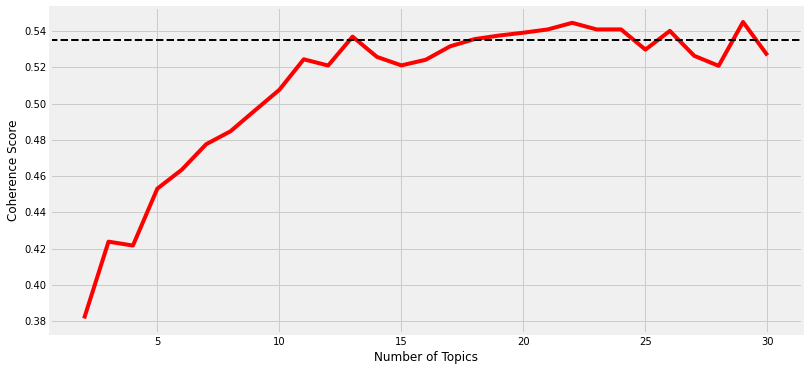

In [50]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

x_ax = range(2, 31, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axhline(y=0.535, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

In [45]:
best_model_idx = coherence_df[coherence_df['Number of Topics'] == 20].index[0]
best_lda_model = lda_models[best_model_idx]
best_lda_model.num_topics

20

In [46]:

topics = [[(term, round(wt, 3)) 
               for term, wt in best_lda_model.show_topic(n, topn=20)] 
                   for n in range(0, best_lda_model.num_topics)]

for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['word', 'recognition', 'speech', 'training', 'character', 'context', 'sequence', 'hmm', 'letter', 'frame', 'speaker', 'state', 'speech_recognition', 'feature', 'phoneme', 'experiment', 'trained', 'segmentation', 'hybrid', 'probability']

Topic #2:
['unit', 'layer', 'net', 'hidden_unit', 'training', 'architecture', 'pattern', 'activation', 'trained', 'back_propagation', 'task', 'hidden_layer', 'connection', 'hidden', 'backpropagation', 'learn', 'step', 'epoch', 'simulation', 'required']

Topic #3:
['circuit', 'chip', 'current', 'analog', 'voltage', 'neuron', 'implementation', 'bit', 'neural', 'design', 'device', 'digital', 'synapse', 'array', 'transistor', 'hardware', 'operation', 'implemented', 'application', 'pulse']

Topic #4:
['training', 'class', 'classification', 'classifier', 'test', 'training_set', 'pattern', 'feature', 'trained', 'sample', 'table', 'experiment', 'prediction', 'test_set', 'accuracy', 'rbf', 'average', 'size', 'measure', 'generalization']

Topic #5:
['

**Viewing LDA Model topics**

In [47]:
topics_df = pd.DataFrame([[term for term, wt in topic] 
                              for topic in topics], 
                         columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20
Term1,word,unit,circuit,training,equation,vector,state,rule,image,signal,distribution,neuron,control,linear,cell,state,image,node,bound,variable
Term2,recognition,layer,chip,class,rate,sequence,memory,representation,feature,noise,gaussian,spike,position,nonlinear,stimulus,action,motion,tree,class,probability
Term3,speech,net,current,classification,eq,code,dynamic,task,object,filter,prior,cell,trajectory,optimal,response,step,visual,search,theorem,structure
Term4,training,hidden_unit,analog,classifier,solution,map,pattern,structure,transformation,source,density,synaptic,target,kernel,activity,policy,region,graph,size,cluster
Term5,character,training,voltage,test,convergence,mapping,recurrent,human,view,channel,mixture,activity,movement,estimate,visual,reinforcement_learning,direction,solution,threshold,level
Term6,context,architecture,neuron,training_set,noise,bit,neuron,connectionist,face,frequency,bayesian,firing,motor,regression,pattern,task,pixel,path,loss,clustering
Term7,sequence,pattern,implementation,pattern,gradient,prediction,attractor,learned,representation,component,estimate,response,hand,approximation,map,control,field,size,proof,mi
Term8,hmm,activation,bit,feature,vector,distance,matrix,language,recognition,sound,approximation,synapsis,controller,solution,receptive_field,environment,edge,parallel,probability,part
Term9,letter,trained,neural,trained,rule,region,capacity,level,distance,detection,likelihood,neural,change,local,cortical,optimal,surface,local,complexity,distribution
Term10,frame,back_propagation,design,sample,average,length,module,knowledge,vector,ica,sample,threshold,forward,constraint,cortex,goal,local,machine,polynomial,statistical


In [49]:
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, best_lda_model.num_topics+1)]
                         )
topics_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Terms per Topic
Topic1,"word, recognition, speech, training, character, context, sequence, hmm, letter, frame, speaker, state, speech_recognition, feature, phoneme, experiment, trained, segmentation, hybrid, probability"
Topic2,"unit, layer, net, hidden_unit, training, architecture, pattern, activation, trained, back_propagation, task, hidden_layer, connection, hidden, backpropagation, learn, step, epoch, simulation, required"
Topic3,"circuit, chip, current, analog, voltage, neuron, implementation, bit, neural, design, device, digital, synapse, array, transistor, hardware, operation, implemented, application, pulse"
Topic4,"training, class, classification, classifier, test, training_set, pattern, feature, trained, sample, table, experiment, prediction, test_set, accuracy, rbf, average, size, measure, generalization"
Topic5,"equation, rate, eq, solution, convergence, noise, gradient, vector, rule, average, curve, theory, limit, line, matrix, optimal, eigenvalue, correlation, generalization_error, teacher"
Topic6,"vector, sequence, code, map, mapping, bit, prediction, distance, region, length, structure, matrix, coding, time_series, dimensional, dimension, encoding, application, protein, element"
Topic7,"state, memory, dynamic, pattern, recurrent, neuron, attractor, matrix, capacity, module, equation, hopfield, transition, fixed_point, sequence, delay, stable, type, connection, associative_memory"
Topic8,"rule, representation, task, structure, human, connectionist, learned, language, level, knowledge, symbol, category, similarity, role, learn, note, represented, context, generalization, domain"
Topic9,"image, feature, object, transformation, view, face, representation, recognition, distance, vector, pixel, pca, digit, principal_component, scale, invariant, invariance, manifold, rotation, linear"
Topic10,"signal, noise, filter, source, channel, frequency, component, sound, detection, ica, auditory, temporal, correlation, phase, response, amplitude, eeg, spectral, peak, independent"


**Interpreting Topic Model Results**

In [51]:
tm_results = best_lda_model[bow_corpus]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [52]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] 
                     for topics in tm_results]
corpus_topics[:5]

[(11, 0.5225239284228048),
 (17, 0.4994752308984047),
 (0, 0.28646626078132925),
 (14, 0.2635732323232324),
 (9, 0.2552643369175628)]

In [53]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(papers))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df['Paper'] = papers

**Dominant Topics in Specific Research Papers**

In [57]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], 
                                                                                         ascending=False)
                                                                             .iloc[0]))


,Document,Dominant Topic,Contribution %,Topic Desc,Paper
Dominant Topic,,,,,
1,687,1,70.91,"word, recognition, speech, training, character, context, sequence, hmm, letter, frame, speaker, state, speech_recognition, feature, phoneme, experiment, trained, segmentation, hybrid, probability","Connected Letter Recognition with a \nMulti-State Time Delay Neural Network \nHermann Hild and Alex Waibel \nSchool of Computer Science \nCarnegie Mellon University \nPittsburgh, PA 15213-3891, US..."
2,250,2,58.66,"unit, layer, net, hidden_unit, training, architecture, pattern, activation, trained, back_propagation, task, hidden_layer, connection, hidden, backpropagation, learn, step, epoch, simulation, requ...","524 Fahlman and Lebiere \nThe Cascade-Correlation Learning Architecture \nScott E. Fahlman and Christian Lebiere \nSchool of Computer Science \nCarnegie-Mellon University \nPittsburgh, PA 15213 \n..."
3,918,3,69.89,"circuit, chip, current, analog, voltage, neuron, implementation, bit, neural, design, device, digital, synapse, array, transistor, hardware, operation, implemented, application, pulse","Single Transistor Learning Synapses \nPaul Hasler, Chris Diorio, Bradley A. Minch, Carver Mead \nCalifornia Institute of Technology \nPasadena, CA 91125 \n(SlS) 95- 2S12 \npaul@hobiecat.pcmp.calt..."
4,633,4,69.60,"training, class, classification, classifier, test, training_set, pattern, feature, trained, sample, table, experiment, prediction, test_set, accuracy, rbf, average, size, measure, generalization","A Boundary Hunting Radial Basis Function \nClassifier Which Allocates Centers \nConstructively \nEric I. Chang and Richard P. Lippmann \nMIT Lincoln Laboratory \nLexington, MA 02173-0073, USA \nAb..."
5,1587,5,69.87,"equation, rate, eq, solution, convergence, noise, gradient, vector, rule, average, curve, theory, limit, line, matrix, optimal, eigenvalue, correlation, generalization_error, teacher","Dynamics of Supervised Learning with \nRestricted Training Sets \nA.C.C. Coolen \nDept of Mathematics \nKing's College London \nStrand, London WC2R 2LS, UK \ntcoolen @mth.kcl.ac.uk \nD. Saad \nNeu..."
6,1276,6,46.79,"vector, sequence, code, map, mapping, bit, prediction, distance, region, length, structure, matrix, coding, time_series, dimensional, dimension, encoding, application, protein, element","Genetic Algorithms and Explicit Search Statistics \nShumeet Baluja \nbaluja@cs.cmu.edu \nJustsystem Pittsburgh Research Center & \nSchool of Computer Science, Carnegie Mellon University \nAbstract..."
7,58,7,53.77,"state, memory, dynamic, pattern, recurrent, neuron, attractor, matrix, capacity, module, equation, hopfield, transition, fixed_point, sequence, delay, stable, type, connection, associative_memory","524 \nBASINS OF ATTRACTION FOR \nELECTRONIC NEURAL NETWORKS \nC. M. Marcus \nR. M. Westervelt \nDivision of Applied Sciences and Department of Physics \nHarvard University, Cambridge, MA 02138 \nA..."
8,669,8,62.66,"rule, representation, task, structure, human, connectionist, learned, language, level, knowledge, symbol, category, similarity, role, learn, note, represented, context, generalization, domain",Analogy--Watershed or Waterloo? \nStructural alignment and the development of \nconnectionist models of analogy \nDedre Gentner Arthur B. Markman \nDepartment of Psychology Department of Psycholog...
9,447,9,54.39,"image, feature, object, transformation, view, face, representation, recognition, distance, vector, pixel, pca, digit, principal_component, scale, invariant, invariance, manifold, rotation, linear",Linear Operator for Object Recognition \nPonen Basil Shimon Ullman* \nM.I.T. Artificial Intelligence Laboratory \nand Department of Brain and Cognitive Science \n545 Technology Square \nCambridge...
